In [3]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv("../data/battery_data.csv")
data.head()

,Voltage_measured,Current_measured,Temperature_measured,Current_charge,Voltage_charge,Time
0,3.486189,0.001417,5.990142,-0.0006,0.002,0.000
1,3.746592,1.489057,5.992528,1.4995,4.618,2.594
2,3.775438,1.490426,5.991340,1.4995,4.669,8.922
3,3.794844,1.491527,6.003554,1.4995,4.694,15.234
4,3.811691,1.491425,6.026729,1.4995,4.707,21.516


In [7]:
data.isnull().sum()
data.describe
data.shape


(1621, 6)

In [10]:
## Normalize time to represent usage
data['usage_index'] = data['Time'] / data['Time'].max()
data.head()



,Voltage_measured,Current_measured,Temperature_measured,Current_charge,Voltage_charge,Time,usage_index
0,3.486189,0.001417,5.990142,-0.0006,0.002,0.000,0.000000
1,3.746592,1.489057,5.992528,1.4995,4.618,2.594,0.000240
2,3.775438,1.490426,5.991340,1.4995,4.669,8.922,0.000826
3,3.794844,1.491527,6.003554,1.4995,4.694,15.234,0.001410
4,3.811691,1.491425,6.026729,1.4995,4.707,21.516,0.001992


In [12]:
data['SoH'] = 100 - (data['usage_index'] * 30)
data[['Time', 'SoH']].head()


,Time,SoH
0,0.000,100.000000
1,2.594,99.992797
2,8.922,99.975224
3,15.234,99.957696
4,21.516,99.940252


In [15]:
temp_norm = data['Temperature_measured'] / data['Temperature_measured'].max()
data['SoH'] = data['SoH'] - (temp_norm * 10)
data['SoH'] = data['SoH'].clip(0, 100)


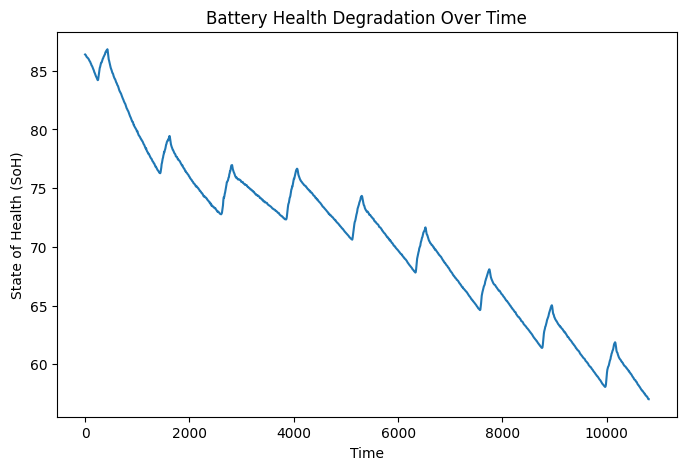

In [16]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.plot(data['Time'], data['SoH'])
plt.xlabel("Time")
plt.ylabel("State of Health (SoH)")
plt.title("Battery Health Degradation Over Time")
plt.show()


In [17]:
features = [
    'Voltage_measured',
    'Current_measured',
    'Temperature_measured',
    'Current_charge',
    'Voltage_charge'
]

X = data[features]
y = data['SoH']


In [18]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [19]:
from sklearn.ensemble import RandomForestRegressor

soh_model = RandomForestRegressor(
    n_estimators=100,
    random_state=42
)

soh_model.fit(X_train, y_train)


,"n_estimators n_estimators: int, default=100The number of trees in the forest... versionchanged:: 0.22 The default value of ``n_estimators`` changed from 10 to 100 in 0.22.",100
,"criterion criterion: {""squared_error"", ""absolute_error"", ""friedman_mse"", ""poisson""}, default=""squared_error""The function to measure the quality of a split. Supported criteriaare ""squared_error"" for the mean squared error, which is equal tovariance reduction as feature selection criterion and minimizes the L2loss using the mean of each terminal node, ""friedman_mse"", which usesmean squared error with Friedman's improvement score for potentialsplits, ""absolute_error"" for the mean absolute error, which minimizesthe L1 loss using the median of each terminal node, and ""poisson"" whichuses reduction in Poisson deviance to find splits.Training using ""absolute_error"" is significantly slowerthan when using ""squared_error""... versionadded:: 0.18 Mean Absolute Error (MAE) criterion... versionadded:: 1.0 Poisson criterion.",'squared_error'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",None
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: {""sqrt"", ""log2"", None}, int or float, default=1.0The number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None or 1.0, then `max_features=n_features`... note:: The default of 1.0 is equivalent to bagged trees and more randomness can be achieved by setting smaller values, e.g. 0.3... versionchanged:: 1.1 The default of `max_features` changed from `""auto""` to 1.0.Note: the search for a split does not stop until at least onevalid partition of the node samples is found, even if it requires toeffectively inspect more than ``max_features`` features.",1.0
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow trees with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsample

In [20]:
from sklearn.metrics import mean_absolute_error

predictions = soh_model.predict(X_test)
mae = mean_absolute_error(y_test, predictions)

print("Mean Absolute Error:", mae)


Mean Absolute Error: 0.07175116802646307


In [21]:
import joblib

joblib.dump(soh_model, "../models/soh_model.pkl")


['../models/soh_model.pkl']